# Perceptron,  transformation explicite et astuce du noyau

## Gradient

Premièrement, amusons nous un peu avec des maths. 

Pour appliquer la descente de gradient, on a évidemment besoin de calculer le gradient de notre fonction de coût (ou perte). Supposons le perceptron suivant avec un rectifieur comme couche d'activation.

$y = w^Tx+b$

$a = rect(y)$ où $rect(x) = \left\{ 
  \begin{array}{l l}
    0 & \quad \text{si $x\le0$}\\
    x & \quad \text{sinon}
  \end{array} \right.$
  
Normalement on utiliserait un softmax pour avoir un vecteur de probabilité, mais j'utilise ici un exemple bidon pour vous faire pratiquer quelques principes de dérivation.

Supposons maintenant qu'on utilise comme fonction de coût la différence au carrée, soit:

$L(a,t) = (a-t)^2$

Si on remplace les variables on obtient 

$\displaystyle L(a,t) = (rect(w^Tx+b)-t)^2$

Ce qui est encore supportable pour les yeux, mais comme vous avez pu le voir dans le devoir, ça peut vite dégénérer. L'idéal, lorsqu'on dérive notre fonction de coût, c'est de tirer profit de ce qu'on appelle la dérivation en chaîne. 

### Rappel sur les dérivations

Petit rappel: La règle de dérivation en chaîne nous dit que 

$\displaystyle \frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x}$ ($y$, $x$ et $u$ n'ont rien à voir avec nos formules.)

Alors si on applique la règle à notre problème, on obtient :

$\displaystyle \frac{\partial L(a,t)}{\partial w} = \frac{\partial L(a,t)}{\partial a}\frac{\partial a}{\partial y}\frac{\partial y}{\partial w}$

Autrement dit, pas besoin de se battre (et de possiblement faire 1001 erreurs de calculs) avec la formule complète de $\frac{\partial L(a,t)}{\partial w}$, on peut calculer séparément $\frac{\partial L(a,t)}{\partial a}$, $\frac{\partial a}{\partial y}$ et $\frac{\partial y}{\partial w}$. 

Rappelez vous de cette règle, elle vous sera nécessaire plus tard (pas aujourd'hui) pour la back-propagation.

#### Dérivation de w^Tx

Lorsqu'on dérive une opération vectorielle ou matricielle tel que $w^Tx$, il est toujours mieux de développer l'équation. Dans notre cas,

$\displaystyle w^Tx = \sum_{i=1}^{d} w_ix_i$

Ainsi, la dérivé n'est pas très compliqué.

$\displaystyle \frac{\partial}{\partial w}w^Tx = \frac{\partial}{\partial w}\sum_{i=1}^{d} w_ix_i = \sum_{i=1}^{d} \frac{\partial}{\partial w} w_ix_i$

Mais attention! $\frac{\partial}{\partial w}w_ix_i \neq x_i$, car on a bien $\frac{\partial}{\partial w}$ et non pas $\frac{\partial}{\partial w_i}$. Il faut donc y aller au cas par cas et calculer pour chaque dimension. 

$\displaystyle \left(\frac{\partial}{\partial w_1}w^Tx,\frac{\partial}{\partial w_2}w^Tx,\dots,\frac{\partial}{\partial w_n}w^Tx\right) = \left(\sum_{i=1}^d \frac{\partial}{\partial w_1} w_ix_i,\sum_{i=1}^d \frac{\partial}{\partial w_2} w_ix_i,\dots,\sum_{i=1}^d \frac{\partial}{\partial w_n} w_ix_i\right)$

Autrement dit 

$\displaystyle \frac{\partial}{\partial w_i}w^Tx = \sum_{j=1}^d \frac{\partial}{\partial w_i} w_jx_j$

Bon, j'en ai trop dit, à vous de terminer la dérivation.

$\displaystyle \frac{\partial}{\partial w_i}w^Tx = \sum_{j=1}^d \frac{\partial}{\partial w_i} w_jx_j = x_i$, remarqué ici la différence dans la notation entre ce résultat et le "attention!" de l'énoncé.

Donc,

$\displaystyle \frac{\partial}{\partial w}w^Tx = (x_1,x_2,...,x_n)$


### Dérivation particulière

Il arrive parfois qu'on se retrouve face à une fonction qui semble impossible à dériver, comme par exemple la fonction indicatrice ou $I_{qqc}$ ou bien la fonction $rect(x)$. Une manière simple de règler le problème est de «casser» l'équation en deux. 

Exemple: $rect(x)$

On sait que $rect(x) = \left\{ 
  \begin{array}{l l}
    0 & \quad \text{si $x\le0$}\\
    x & \quad \text{sinon}
  \end{array} \right.$
  
Si on remplace $x$ par l'équation $wx+b$, on obtient

$rect(wx+b) = \left\{ 
  \begin{array}{l l}
    0 & \quad \text{si $w^Tx+b\le0$}\\
    wx+b & \quad \text{sinon}
  \end{array} \right.$

Il ne reste plus qu'à remonter d'un niveau et on obtient 

$\displaystyle L(y,t) = \left\{ 
  \begin{array}{l l}
    t^2 & \quad \text{si $w^Tx+b\le0$}\\
    (w^Tx+b-t)^2 & \quad \text{sinon}
  \end{array} \right.$

On peut maintenant dériver $t^2$ et $(w^Tx+b-t)^2$. N'oubliez pas la dérivation en chaîne. La deuxième équation peut être écrite $(y-t)^2$.

Maintenant, à vos crayons, prêts, dérivez $\displaystyle\frac{\partial L(y,t)}{\partial w}$!

N'oublions pas que $\displaystyle y = rect(w^Tx+b)$ et que $\displaystyle L(y,t) = (y-t)^2$

cas $\displaystyle w^Tx+b \leq 0$

$\displaystyle\frac{\partial L(y,t)}{\partial w} = \frac{\partial}{\partial w} t^2 = 0$ 

cas $\displaystyle w^Tx+b > 0$

$\displaystyle\frac{\partial L(y,t)}{\partial w} = \frac{\partial}{\partial w} (w^Tx+b-t)^2 $

$\displaystyle = 2(w^Tx+b-t) \frac{\partial}{\partial w} (w^Tx+b-t)$

En utilisant le résultat précédent,

$\displaystyle \frac{\partial L(y,t)}{\partial w_i} = 2(w^Tx+b-t) x_i$

Il y a donc une dérivée par compostante du vecteurs de poids.

## 1. Transformations non-linéaires
Pour démontrer l'utilité des transformations non-linéaires, nous allons utiliser les ensembles de données cercle et ellipse, disponible sur la page du site. On va premièrement appliquer une transformation sur les données avant l'entraînement. L'algorithme ne touchera que les données transformées. On ne se cassera pas la tête pour commencer, implémentez simplement une transformation polynomiale de deuxième degré.

Petit rappel:

$\phi_{\text{poly}^2}(x) = \left(x_1,x_2,\dots,x_d,
\alpha_{11} x_1^2, \alpha_{22}x2^2, \dots, \alpha_{dd}x_d^2,
\alpha_{12}x_1x_2, \alpha_{13}x_1x_2, \dots, \alpha_{1d}x_1x_d, \dots, \alpha_{(d-1)d}x_{d-1}x_d\right)$

Pour faire simple, on peut mettre $\alpha_i=1$ $\forall i$

Et pour faire encore plus simple, les données cercles et ellipse sont seulement en 2-d...

$$\phi : \mathbb{R}^2 \rightarrow \mathbb{R}^5$$

$$\phi(x_1, x_2) = \left(x_1,x_2,x_1^2,x_2^2,x_1x_2\right)$$

Implémentez cette transformation dans la fonction polynome ci-dessous:








In [1]:
%pylab inline
import numpy as np
import utilitaires
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
# prends une matrice de données x (exemples, traits de l'espace de départ) en entrée (sans cibles) et renvoie la matrice
# transformée (exemples, traits de l'espace projeté)
def polynome(X):
	Y = np.zeros((X.shape[0], 5))
	Y[:,0] = X[:,0]
	Y[:,1] = X[:,1]
	Y[:,2] = X[:,0]**2
	Y[:,3] = X[:,1]**2
	Y[:,4] = X[:,0]*X[:,1]
	return Y

Maintenant que la transformation est implémentée, vous pouvez lancer le code ci-dessous pour regarder les performances de votre algorithme.

In [3]:
class perceptron:
	def __init__(self, mu):
		self.mu = mu
    
	def train(self, train_data):
          nb_example = train_data.shape[0]

          self.weights = np.random.random(train_data.shape[1])
          self.weights[-1] = 0
          datas = np.array(train_data)
          datas[:,-1] = 1
          i = 0
          count = 0 # We stop when the set is linearly separated
          n_iter = 0
          n_iter_max = nb_example*100
          while (count < nb_example and n_iter < n_iter_max):
            if (np.dot(datas[i], self.weights)) * train_data[i,-1] < 0:
              self.weights += self.mu * train_data[i,-1] * datas[i]
              count = 0
            else:
              count = count + 1
            i = (i + 1) % nb_example
            n_iter += 1

	def compute_predictions(self, test_data):

           sorties = []
           for i in range(len(test_data)):
             data = []
             for j in range(len(test_data[i])):
               data.append(test_data[i][j])
             data.append(1)
             sorties.append(np.dot(data, self.weights))
           return sorties

On va entrainer un perceptron sur  1500  exemples d'entrainement
Ca nous a pris  0.006943  secondes pour calculer les predictions sur  500  points de test
L'erreur de test est de  0.4 %


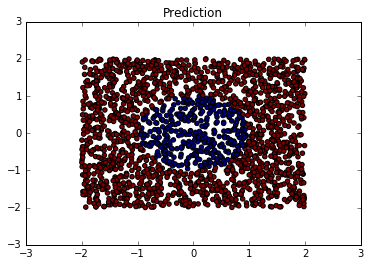

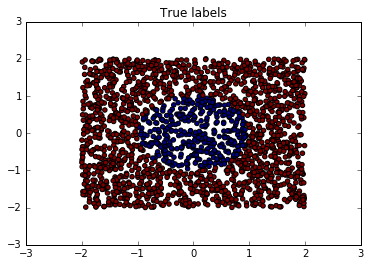

In [4]:
# On commence par charger les données
data = np.loadtxt('cercle.txt')
#data = np.loadtxt('ellipse.txt')

# Il n'y a que deux dimensions...
train_cols = [0,1]
# Une variable pour contenir l'indice de la colonne correspondant aux étiquettes.
target_ind = [data.shape[1] - 1]

# Nombre de classes
n_classes = 2
# Nombre de points d'entrainement
n_train = 1500
# Taille de la grille = grid_size x grid_size
grid_size = 50

print "On va entrainer un perceptron sur ", n_train, " exemples d'entrainement"

# decommenter pour avoir des resultats non-deterministes 
random.seed(3395)

# Déterminer au hasard des indices pour les exemples d'entrainement et de test
inds = range(data.shape[0])
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Separer les donnees dans les deux ensembles: entrainement et test.
train_set = data[train_inds,:]	# garder les bonnes lignes
train_set = train_set[:,train_cols + target_ind]  # garder les bonnes colonnes
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separarer l'ensemble de test: entrees et etiquettes.
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

# Le taux d'apprentissage
mu = 0.005

# Transforme les données
transformed_train_set = np.concatenate((polynome(train_set[:,:-1]),train_set[:,-1][:,None]),axis=1)
transformed_test_inputs = polynome(test_inputs)

# Créer et entrainer le modele
model_perceptron = perceptron(mu)
model_perceptron.train(transformed_train_set)

# Obtenir les sorties sur l'ensemble de test.
t1 = time.clock()
les_sorties = model_perceptron.compute_predictions(transformed_test_inputs)
t2 = time.clock()
print 'Ca nous a pris ', t2-t1, ' secondes pour calculer les predictions sur ', transformed_test_inputs.shape[0],' points de test'

# Convertir les sorties en classe. On prend le signe.
classes_pred = np.sign(les_sorties)
   
# Mesurer la performance.
err = 1.0 - np.mean(test_labels==classes_pred)
print "L'erreur de test est de ", 100.0 * err,"%"

# Affichage graphique
if len(train_cols) == 2:
    # Surface de decision
    t1 = time.clock()
    les_sorties = model_perceptron.compute_predictions(transformed_train_set[:,:-1])
    # Convertir les sorties en classe. On prend le signe.
    train_classes_pred = np.sign(les_sorties)
    plt.scatter(train_set[:,0],train_set[:,1],c=train_classes_pred)
    plt.scatter(test_set[:,0],test_set[:,1],c=classes_pred)
    plt.title('Prediction')
    plt.show()
    
    plt.scatter(train_set[:,0],train_set[:,1],c=train_set[:,-1])
    plt.scatter(test_set[:,0],test_set[:,1],c=test_labels)
    plt.title('True labels')
    plt.show()

    t2 = time.clock()
        
else:
    print 'Trop de dimensions (', len(train_cols),') pour pouvoir afficher la surface de decision'

## 2. Astuce du noyau

L'objectif de cette section est d'implémenter un perceptron à noyau polynomial.

In [5]:
def kernel(x,y,deg=2):
    return 1 + np.dot(x, y.T)**deg

Vous pouvez ensuite compléter le code suivant.

In [6]:
class KernelPerceptron:
    def __init__(self, mu):
        self.mu = mu

    def train(self, train_data):
        nb_example = train_data.shape[0]
        self.train_data = np.array(train_data)

        # Initialise les alphas
        self.a = np.zeros(nb_example)

        # Retire les cibles
        train_x = self.train_x = self.train_data[:,:-1]
        train_y = self.train_y = self.train_data[:,-1]

        # Gram matrix
        K = np.zeros((nb_example, nb_example))
        for i in range(nb_example):
            K[i] = kernel(train_x[i], train_x)

        # Calcul du kernel
        i = 0
        count = 0
        n_iter = 0
        n_iter_max = nb_example*100
        while (count < nb_example and n_iter < n_iter_max):
            if np.sign(np.sum(K[i] * self.a * train_y)) != train_y[i]:
                self.a[i] += 1.0
                count = 0
            else:
                count = count + 1
            i = (i + 1) % nb_example
            n_iter += 1

    def compute_predictions(self, test_data):
        sorties = []
        for i in range(len(test_data)):
            sorties.append(np.sum(kernel(test_data[i], self.train_x)*self.a*self.train_y))
        return sorties

On va entrainer un algo lineaire sur  1500  exemples d'entrainement
Ca nous a pris  0.014105  secondes pour calculer les predictions sur  500  points de test
L'erreur de test est de  0.2 %


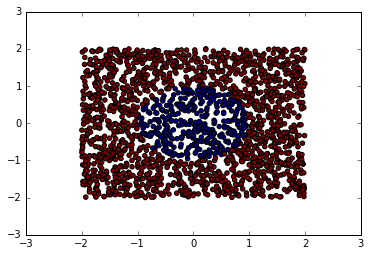

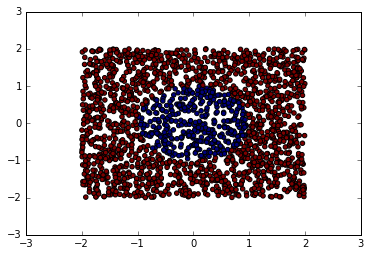

In [7]:
# charger les donnees
#data = np.loadtxt('ellipse.txt')
data = np.loadtxt('cercle.txt')

# Les colonnes (traits/caracteristiques) sur lesqueles on va entrainer notre modele
# Pour que gridplot fonctionne, len(train_cols) devrait etre 2
train_cols = [0,1]
# L'indice de la colonne contenant les etiquettes
target_ind = [data.shape[1] - 1]

# Nombre de classes
n_classes = 2
# Nombre de points d'entrainement
n_train = 1500
# Taille de la grille = grid_size x grid_size
grid_size = 50

print "On va entrainer un algo lineaire sur ", n_train, " exemples d'entrainement"

# decommenter pour avoir des resultats non-deterministes
np.random.seed(3395)
# DÃ©terminer au hasard des indices pour les exemples d'entrainement et de test
inds = range(data.shape[0])
np.random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# separer les donnees dans les deux ensembles
train_set = data[train_inds,:]
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# separarer l'ensemble de test dans les entrees et les etiquettes
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

mu = 0.00005
model = KernelPerceptron(mu)
model.train(train_set)

# Obtenir ses prÃ©dictions
t1 = time.clock()
les_sorties = model.compute_predictions(test_inputs)

t2 = time.clock()
print 'Ca nous a pris ', t2-t1, ' secondes pour calculer les predictions sur ', test_inputs.shape[0],' points de test'

# Vote majoritaire (+1 puisquie nos classes sont de 1 a n)
classes_pred = np.sign(les_sorties)

# Faire les tests
err = 1.0 - np.mean(test_labels==classes_pred)
print "L'erreur de test est de ", 100.0 * err,"%"

if len(train_cols) == 2:
    # Surface de decision
    les_sorties = model.compute_predictions(train_set[:,:-1])
    train_classes_pred = np.sign(les_sorties)
    plt.scatter(train_set[:,0],train_set[:,1],c=train_classes_pred)
    plt.scatter(test_set[:,0],test_set[:,1],c=classes_pred)
    plt.show()

    plt.scatter(train_set[:,0],train_set[:,1],c=train_set[:,-1])
    plt.scatter(test_set[:,0],test_set[:,1],c=test_labels)
    plt.show()
else:
    print 'Trop de dimensions (', len(train_cols),') pour pouvoir afficher la surface de decision'